In [5]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

## Hall sensor Lab
###### Brandon Weiss, Zach McCarthy
### 22 September 2020

First image is of the circuit

Second image is a closeup of the breadboard

<img src="Hall Circuit.jpg">

<img src="Closeup.jpg">

Schematic of the lab

<img src="Hall Schematic.PNG">

How I measured distance

<img src="TapeMeasure.jpeg">

Procedure:
1. Hook up the circuit as described above
2. Measure voltage using a digital multimeter on the 20 V setting
3. Measure distance to hall sensor by using a tape measurer, as shown above
4. Repeat measurements with the other end of the magnet

In [58]:
#Collecting data points
Dist = np.array([0.001, .125, .25, .375, .5, .625, .75, 1, 1.25])
VH1 = np.array([3.26, 2.63, 2.50, 2.47, 2.44, 2.43, 2.42, 2.42, 2.41])
VH2 = np.array([1.87, 2.25, 2.33, 2.36, 2.38, 2.39, 2.40, 2.40, 2.41])
# Error in distance measurements ~1/32 in

In [50]:
#Plotting data points
mytable = pd.DataFrame(zip(Dist, VH1, VH2), columns=['Distance (in)', 'Voltage of up (V)', 'Voltage of down (V)'])
mytable

,Distance (in),Voltage of up (V),Voltage of down (V)
0,0.001,3.26,1.87
1,0.125,2.63,2.25
2,0.250,2.50,2.33
3,0.375,2.47,2.36
4,0.500,2.44,2.38
5,0.625,2.43,2.39
6,0.750,2.42,2.40
7,1.000,2.42,2.40
8,1.250,2.41,2.41


In [47]:
# Define a function to generate the fit
def fit(x, A, B, C):
    return A*x**B + C

In [48]:
# Getting the coefficients to the fit for VH1
guess = (1.0, -2.0, 1.0)
fitparams, covars = curve_fit(fit, Dist[1:], VH1[1:], p0=guess)
print("Parameters: " + str(fitparams))
print(covars)
# fitparams[0] is approx. measured in V-in, fitparams[1] is dimesionless, 
# fitparams[2] is measured in V
# Uncertainty in the fit parameters is given by the diagonals of the covariance matrix

Parameters: [ 0.02421806 -1.10025327  2.39122957]
[[ 2.68027553e-05  4.73923300e-04 -3.53836117e-05]
 [ 4.73923300e-04  8.49657258e-03 -6.14256497e-04]
 [-3.53836117e-05 -6.14256497e-04  5.07491434e-05]]


In [54]:
# Getting the coefficients to the fit for VH2
guess2 = (1.0, -1.1, 1.0)
fitparams2, covars2 = curve_fit(fit, Dist[1:], VH2[1:], p0=guess)
print("Parameters: " + str(fitparams2))
print(covars2)
# fitparams2[0] is approx. measured in V-in, fitparams2[1] is dimesionless, 
# fitparams2[2] is measured in V
# Uncertainty in the fit parameters is given by the diagonals of the covariance matrix

Parameters: [-0.03448563 -0.81970109  2.4390681 ]
[[ 4.50836713e-05 -5.13180734e-04 -5.25027289e-05]
 [-5.13180734e-04  5.92873111e-03  5.90092625e-04]
 [-5.25027289e-05  5.90092625e-04  6.31709849e-05]]


In [74]:
# Calculating the residual for all the data points
def calcRes(x, y, fit):
    res = np.subtract([fit[0]*z**fit[1]+fit[2] for z in x], y)
    return res
res = calcRes(Dist[1:], VH1[1:], fitparams)
res2 = calcRes(Dist[1:], VH2[1:], fitparams2)

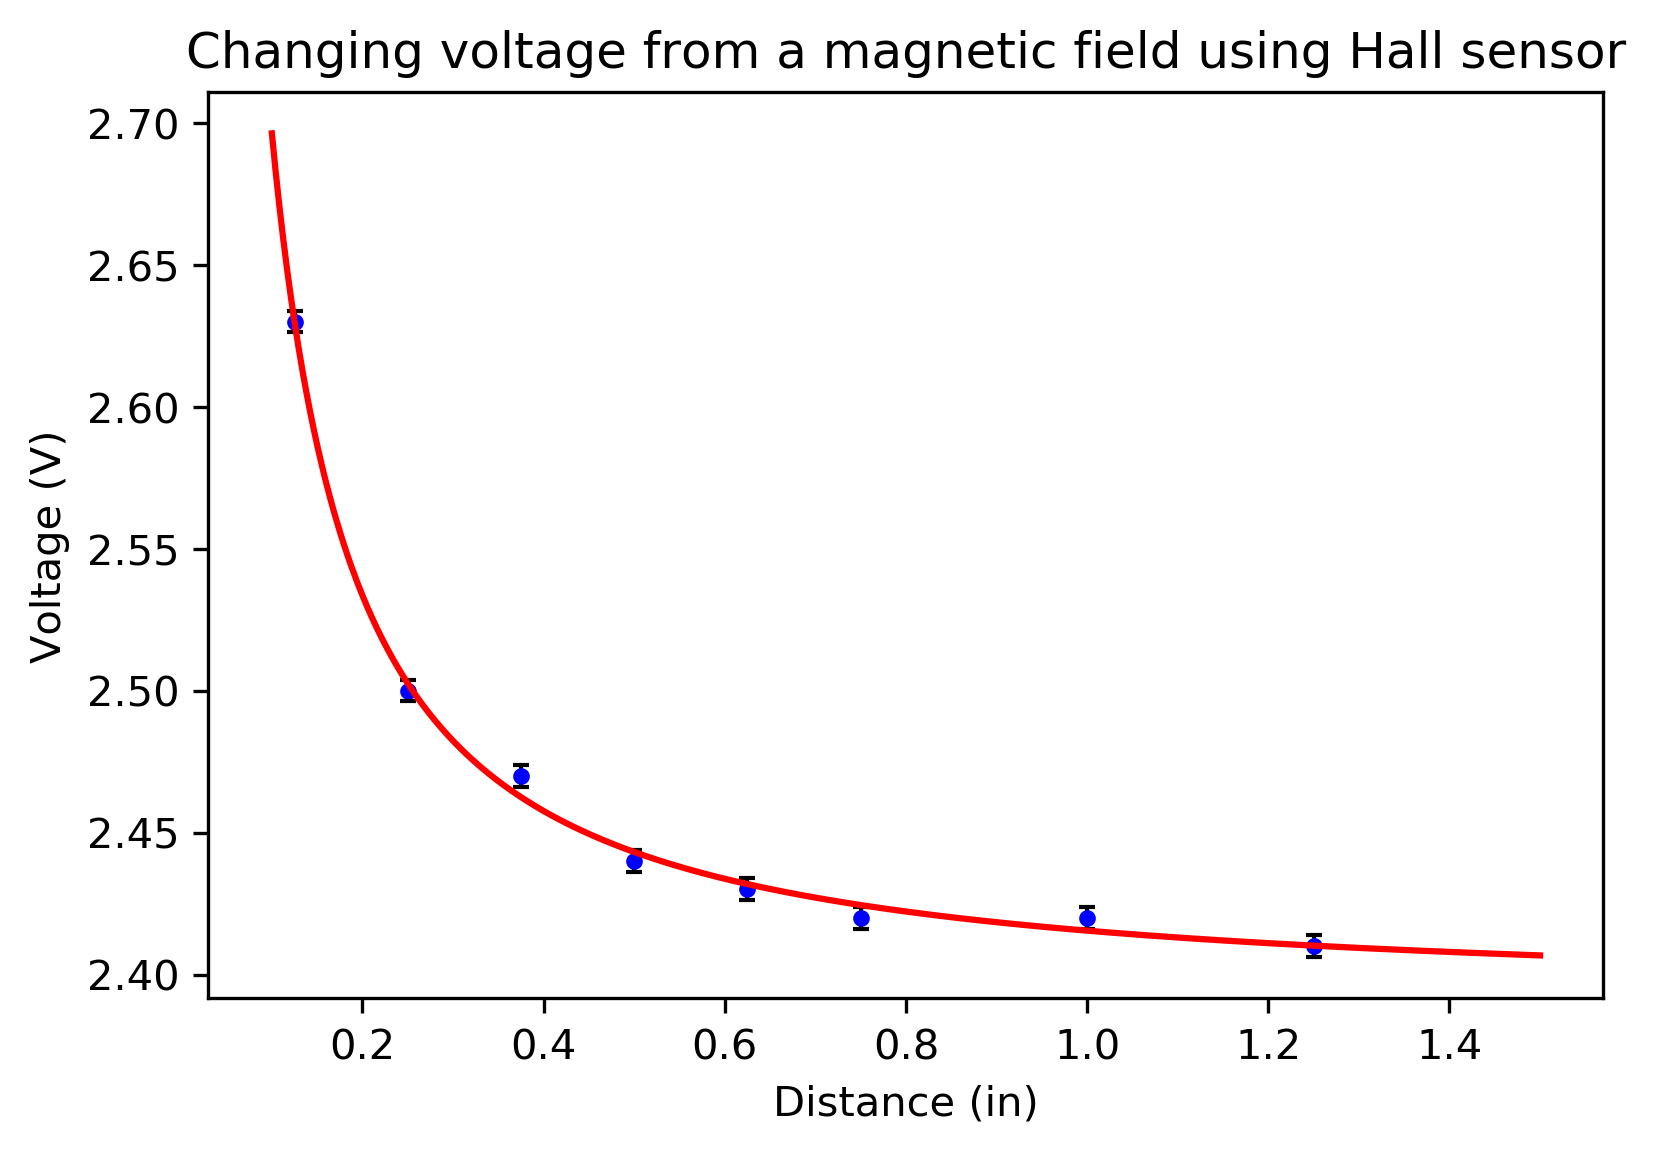

In [77]:
xspace = np.linspace(.1,1.5,1000)
plt.figure(dpi=300)
plt.title('Changing voltage from a magnetic field using Hall sensor')
plt.xlabel('Distance (in)')
plt.ylabel('Voltage (V)')
plt.plot(Dist[1:], VH1[1:], "b.")
plt.errorbar(Dist[1:], VH1[1:], np.std(res), ls='none', color='black', capsize=2, elinewidth=1)
plt.plot(xspace, [fitparams[0]*x**fitparams[1] + fitparams[2] for x in xspace], "r-")

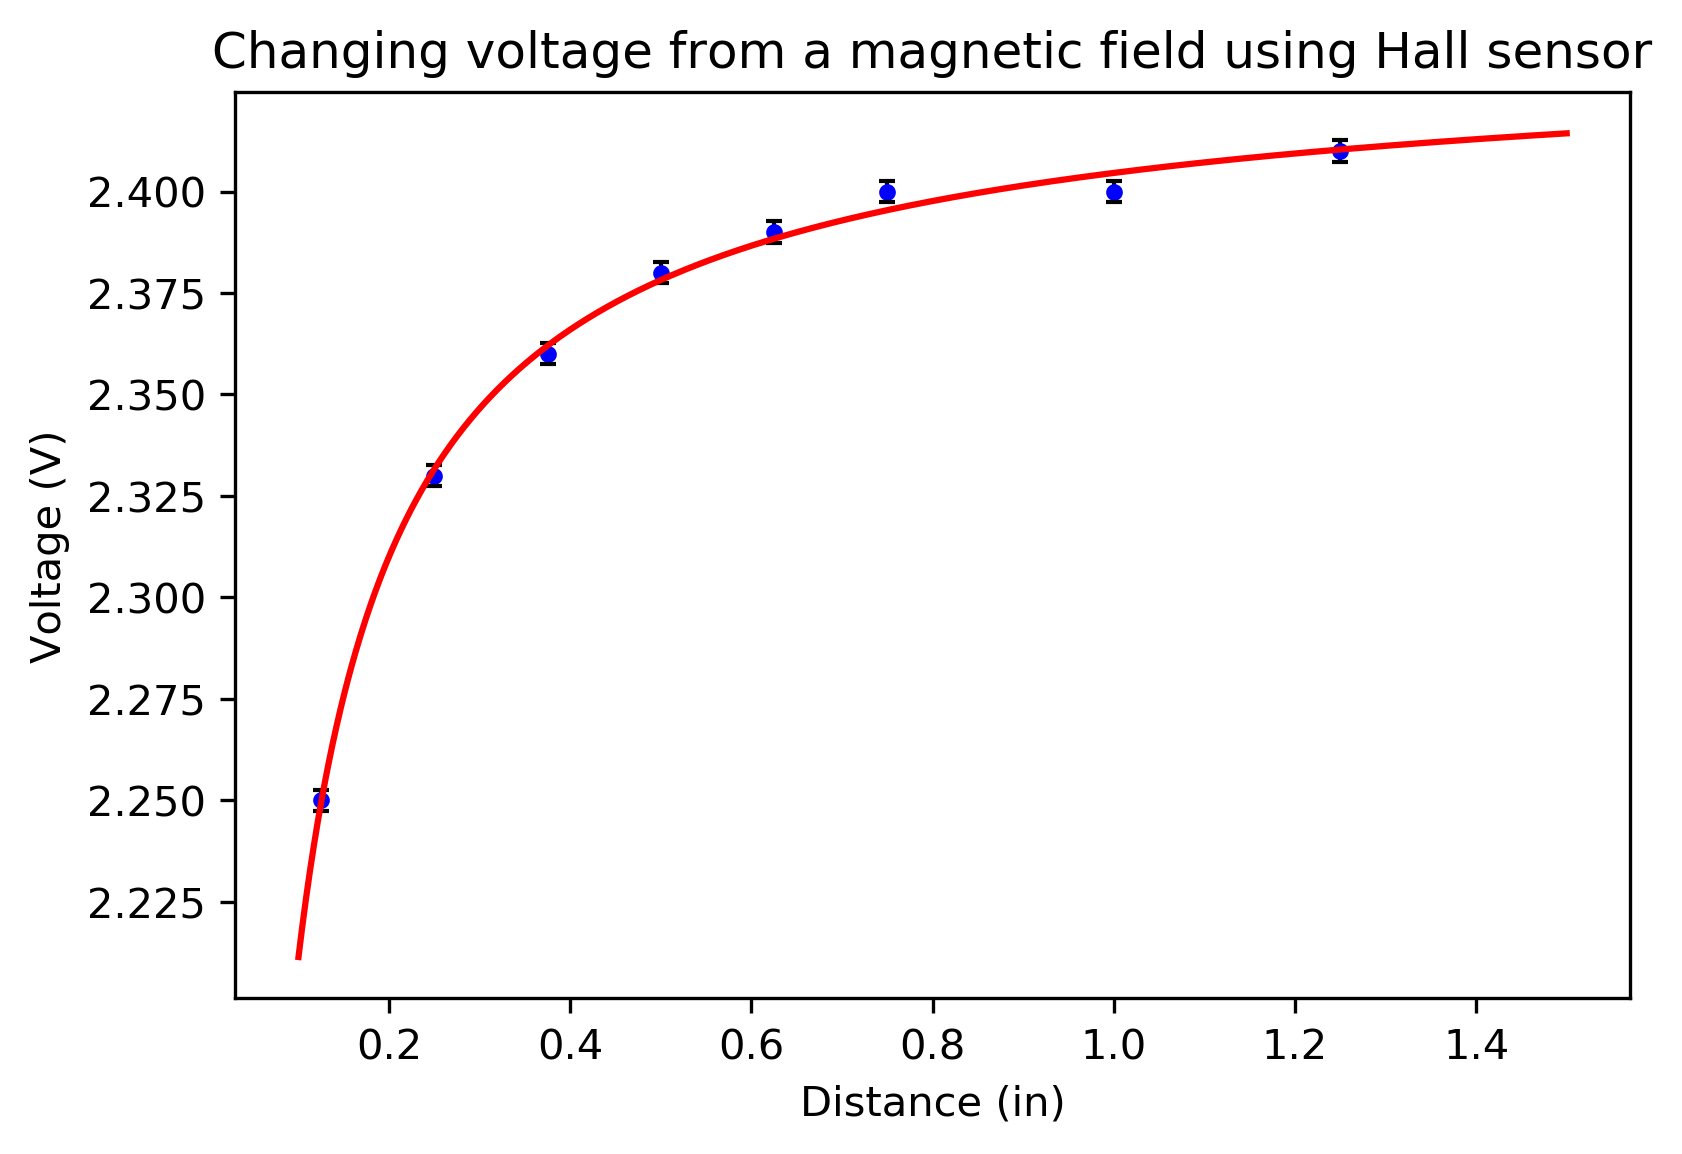

In [79]:
xspace2 = np.linspace(.1,1.5,1000)
plt.figure(dpi=300)
plt.title('Changing voltage from a magnetic field using Hall sensor')
plt.xlabel('Distance (in)')
plt.ylabel('Voltage (V)')
plt.plot(Dist[1:], VH2[1:], "b.")
plt.errorbar(Dist[1:], VH2[1:], np.std(res2), ls='none', color='black', capsize=2, elinewidth=1)
plt.plot(xspace, [fitparams2[0]*x**fitparams2[1] + fitparams2[2] for x in xspace2], "r-")

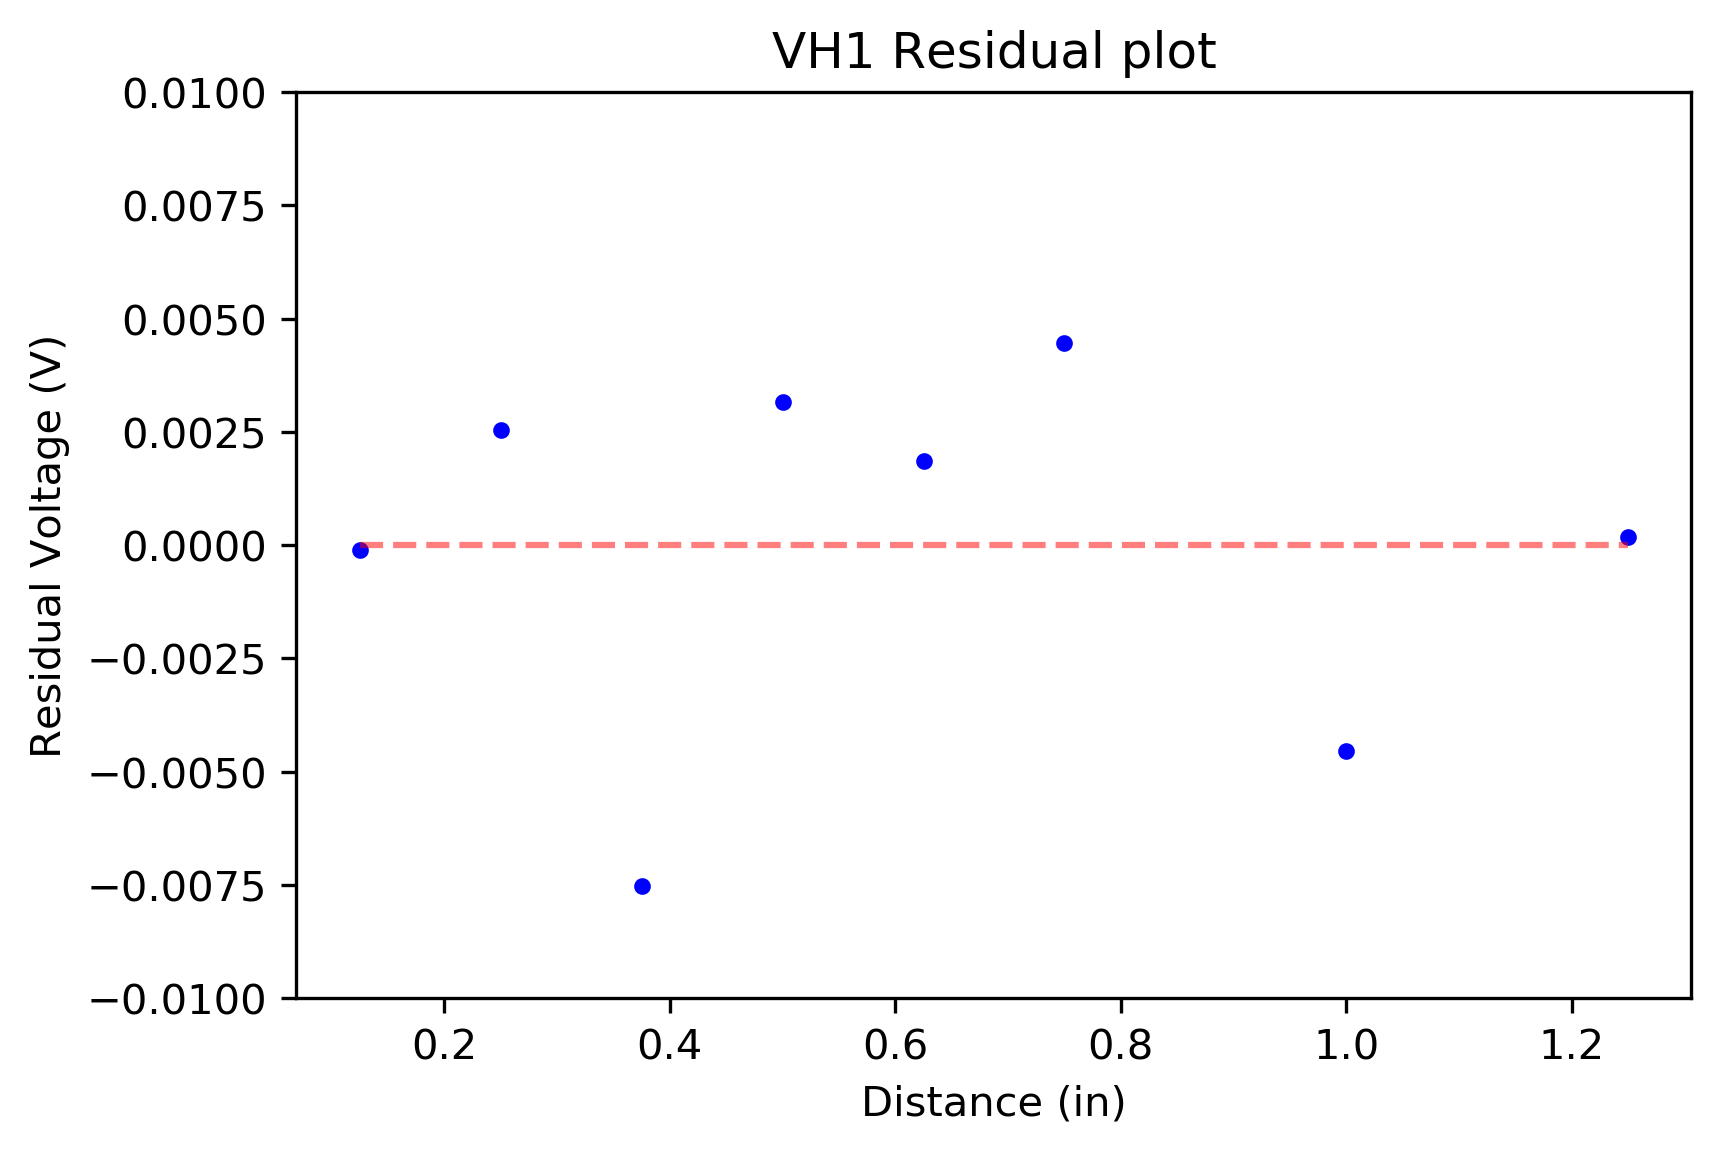

In [72]:
# Plotting the residual of all the data points for VH1
plt.figure(dpi=300)
plt.ylim(ymin=-0.01, ymax=0.01)
plt.title('VH1 Residual plot')
plt.ylabel('Residual Voltage (V)')
plt.xlabel('Distance (in)')
plt.plot(Dist[1:], res, "b.")
plt.plot(Dist[1:], np.zeros(8), "r--", alpha=0.5)

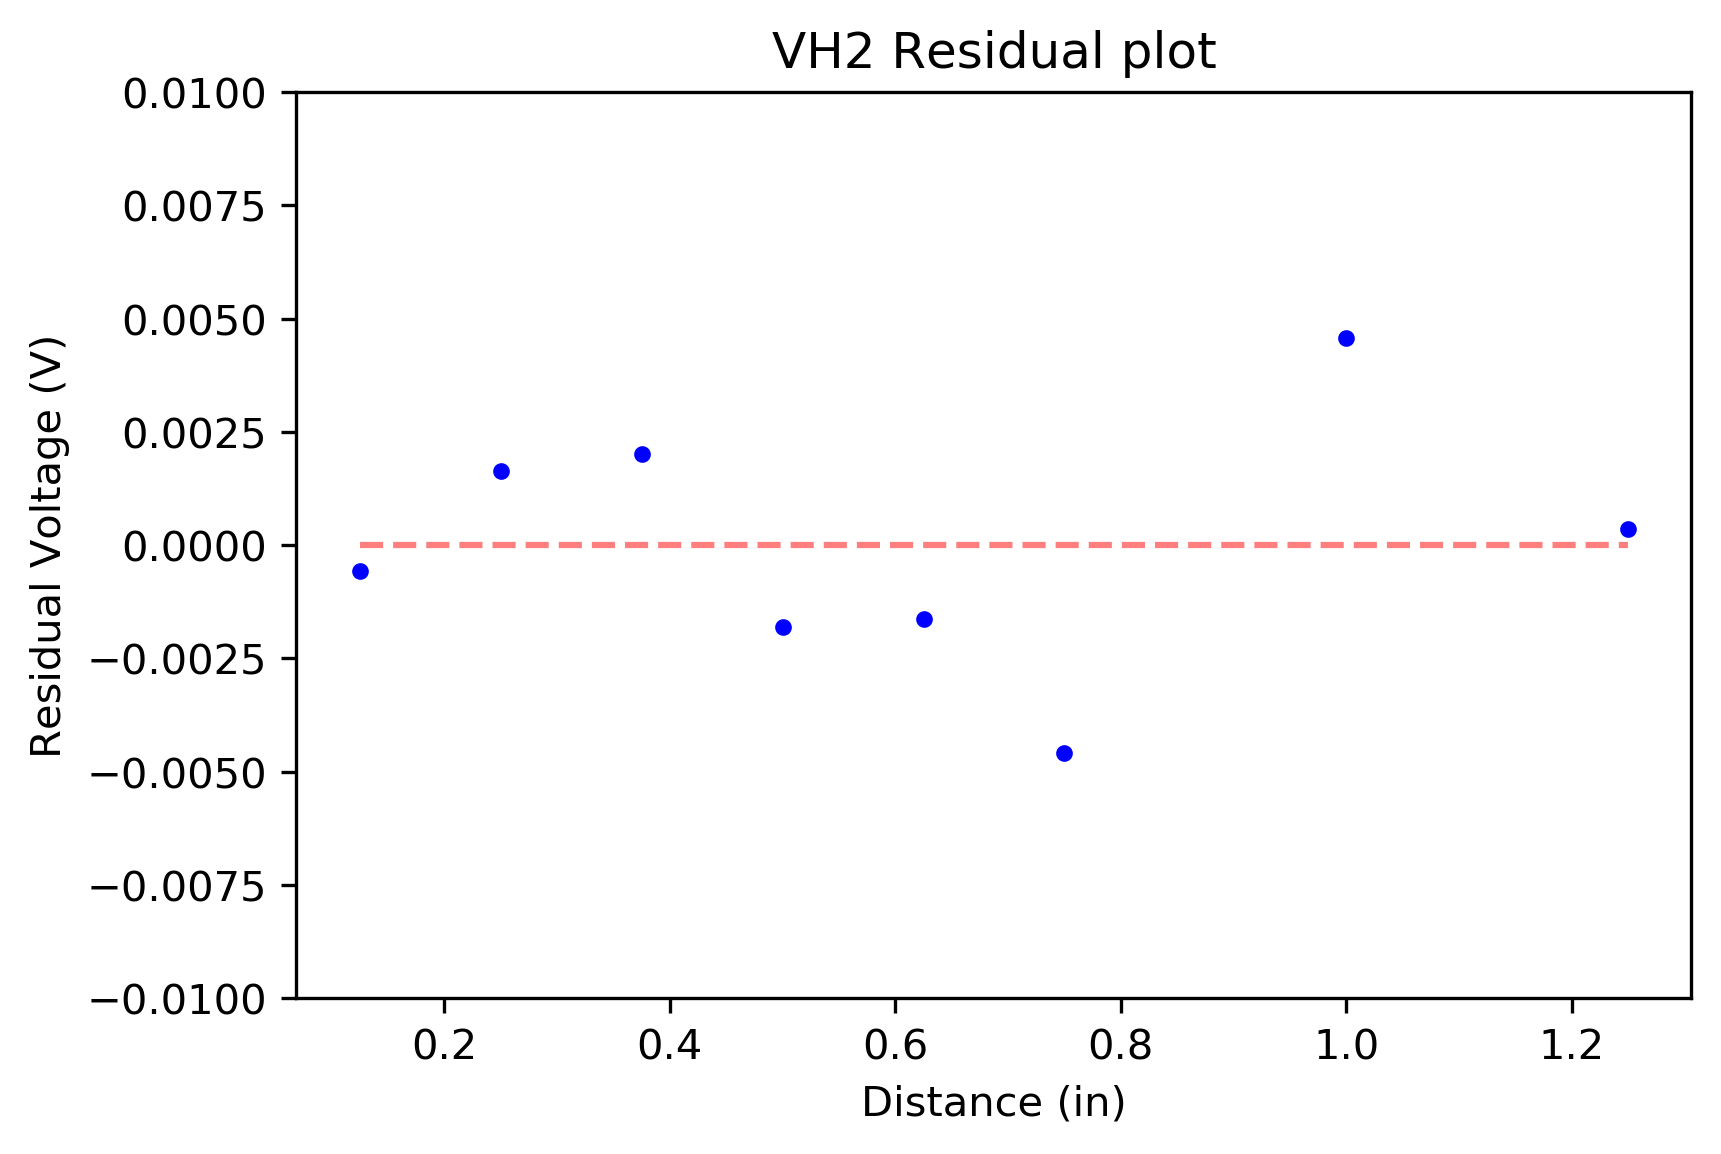

In [73]:
# Plotting the residual of all the data points for VH2
plt.figure(dpi=300)
plt.ylim(ymin=-0.01, ymax=0.01)
plt.title('VH2 Residual plot')
plt.ylabel('Residual Voltage (V)')
plt.xlabel('Distance (in)')
plt.plot(Dist[1:], res2, "b.")
plt.plot(Dist[1:], np.zeros(8), "r--", alpha=0.5)

In [71]:
# Using the standard deviation of the residuals as one possible method for
# the uncertainty of the measurements
print("VH1 Uncertainty: " + str(np.std(res)))
print("VH2 Uncertainty: " + str(np.std(res2)))

VH1 Uncertainty: 0.003824588730171428
VH2 Uncertainty: 0.0026241075885595367


Consider measuring the voltage at the same distance multiple times, so then a standard deviation can be calculated to get the error in voltage measurement.

Dominating error can also be the precision of the voltmeter.

Since there's more action happening when dist -> 0, it will be healpful for future fits/experiments to take more data points in that domain.

Possible sources of error:
1. Electronic devices in the vicinity messing with the magnetic field